## 1. Importing Libraries and Fixed Random Seed



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import re
import tensorflow as tf
import keras
import warnings

from sklearn.model_selection import train_test_split
# from google.colab import drive
from tensorflow.keras import models, layers, regularizers, callbacks
from keras import models, layers, regularizers

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras

# Ignore warings
warnings.filterwarnings("ignore", category=UserWarning)

# Config retina
%config InlineBackend.figure_format = 'retina'

# Fixing seeds
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(88)

# Check sample data without ...
# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## 2. Importing Dataset

In [2]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

display(train.head(10))
display(test.head(10))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
5,TRAIN_00005,55,F,High graduate,Full-Time,50,Retail,Services,White,All other,...,Native,US,US,US,Single,0,0,560,Under Median,300
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0
8,TRAIN_00008,24,F,Bachelors degree,Children or Armed Forces,52,Retail,Sales,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
9,TRAIN_00009,53,M,High graduate,Seeking Full-Time,30,Construction,Machine Operators & Inspectors,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
5,TEST_0005,31,M,High Freshman,Full-Time,24,Construction,Transportation,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
6,TEST_0006,17,M,High Freshman,Full-Time,51,Retail,Services,White,All other,...,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median
7,TEST_0007,11,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median
8,TEST_0008,71,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median
9,TEST_0009,43,M,College,Full-Time,52,Transportation,Admin Support (include Clerical),Black,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown


In [3]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
train.shape, test.shape

((20000, 23), (10000, 22))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

In [7]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [8]:
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [12]:
# Replace null value with 'other'
test['Household_Status'] = test['Household_Status'].fillna('other')
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [13]:
train.describe(include='all')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
count,20000,20000.000000,20000,20000,20000,20000.000000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000,20000.000000
unique,20000,NaN,2,17,8,NaN,24,15,5,10,...,5,43,43,43,6,NaN,NaN,NaN,3,NaN
top,TRAIN_00000,NaN,F,High graduate,Children or Armed Forces,NaN,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),NaN,NaN,NaN,Under Median,NaN
freq,1,NaN,10472,6494,11142,NaN,4688,4688,16845,17769,...,17825,17825,16563,16594,8588,NaN,NaN,NaN,13237,NaN
mean,NaN,35.632500,NaN,NaN,NaN,34.943050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,383.129500,40.202150,123.451450,NaN,554.565250
std,NaN,17.994414,NaN,NaN,NaN,22.254592,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4144.247487,279.182677,1206.949429,NaN,701.553155
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,34.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,500.000000
75%,NaN,47.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,875.000000


In [14]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [15]:
train.describe(include='object')

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Income_Status
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,20000,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),Under Median
freq,1,10472,6494,11142,4688,4688,16845,17769,9554,6087,8552,17825,17825,16563,16594,8588,13237


## 3. Update labels

In [23]:
# Remove special characters and replace spaces with underscores in column names
train.columns = train.columns.str.replace('(', '', regex=False) \
                               .str.replace(')', '', regex=False) \
                               .str.replace(' ', '_', regex=False)
test.columns = test.columns.str.replace('(', '', regex=False) \
                              .str.replace(')', '', regex=False) \
                              .str.replace(' ', '_', regex=False)

In [27]:
# Select object columns
object_cols = list(train.select_dtypes(include=['object']).columns)

# Correctly formatted regex pattern to match the special characters you listed
pattern = r'[#@&\[\]<()]\+'

# Remove special characters in object columns
for col in object_cols:
    train[col] = train[col].str.replace(pattern, '', regex=True)
    test[col] = test[col].str.replace(pattern, '', regex=True)

In [28]:
train[13810:13820]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week_Yearly,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Gains,Losses,Dividends,Income_Status,Income
13810,TRAIN_13810,45,F,High graduate,Full-Time,52,Manufacturing Durable,Machine Operators Inspectors,White,All other,Divorced,Secondary individual,Nonrelative of householder,Native,US,US,US,Single,0,0,0,Unknown,635
13811,TRAIN_13811,28,F,Bachelors degree,Children or Armed Forces,51,Public Administration,Professional,White,All other,Single,Secondary individual,Nonrelative of householder,Native,US,US,US,Single,0,1876,0,Under Median,0
13812,TRAIN_13812,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Central or South American,Single,Child 18 never marr not in subfamily,Child under 18 never married,Native,US,Peru,Peru,Nonfiler,0,0,0,Under Median,0
13813,TRAIN_13813,49,F,College,Full-Time,52,Other professional services,Management,White,All other,Married,Spouse of householder,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 MFJ,0,0,0,Under Median,1000
13814,TRAIN_13814,24,M,High graduate,Part-Time Usually Part-Time,26,Manufacturing Durable,Transportation,White,All other,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Native,US,US,US,Single,0,0,0,Unknown,700
13815,TRAIN_13815,36,M,High graduate,Children or Armed Forces,52,Retail,Sales,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 MFJ,0,0,0,Unknown,0
13816,TRAIN_13816,73,F,Elementary 1-4,Not Working,0,Not in universe or children,Unknown,White,All other,Married,Spouse of householder,Spouse of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
13817,TRAIN_13817,50,F,High graduate,Children or Armed Forces,48,Private Household Services,Private Household Services,White,All other,Married,Spouse of householder,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 MFJ,0,0,0,Unknown,650
13818,TRAIN_13818,20,F,College,Full-Time,52,Retail,Sales,Asian/Pacific,All other,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Foreign-born Non-US Citizen,Philippines,Philippines,Philippines,Single,0,0,0,Unknown,575
13819,TRAIN_13819,25,M,College,Full-Time,52,Construction,Craft Repair,White,All other,Single,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,700


## 4. EDA (Exploratory Data Analysis)

In [ ]:
train.isna().sum()

ID                      0
Age                     0
Gender                  0
Education_Status        0
Employment_Status       0
Working_Week_Yearly     0
Industry_Status         0
Occupation_Status       0
Race                    0
Hispanic_Origin         0
Martial_Status          0
Household_Status        0
Household_Summary       0
Citizenship             0
Birth_Country           0
Birth_Country_Father    0
Birth_Country_Mother    0
Tax_Status              0
Gains                   0
Losses                  0
Dividends               0
Income_Status           0
Income                  0
dtype: int64

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

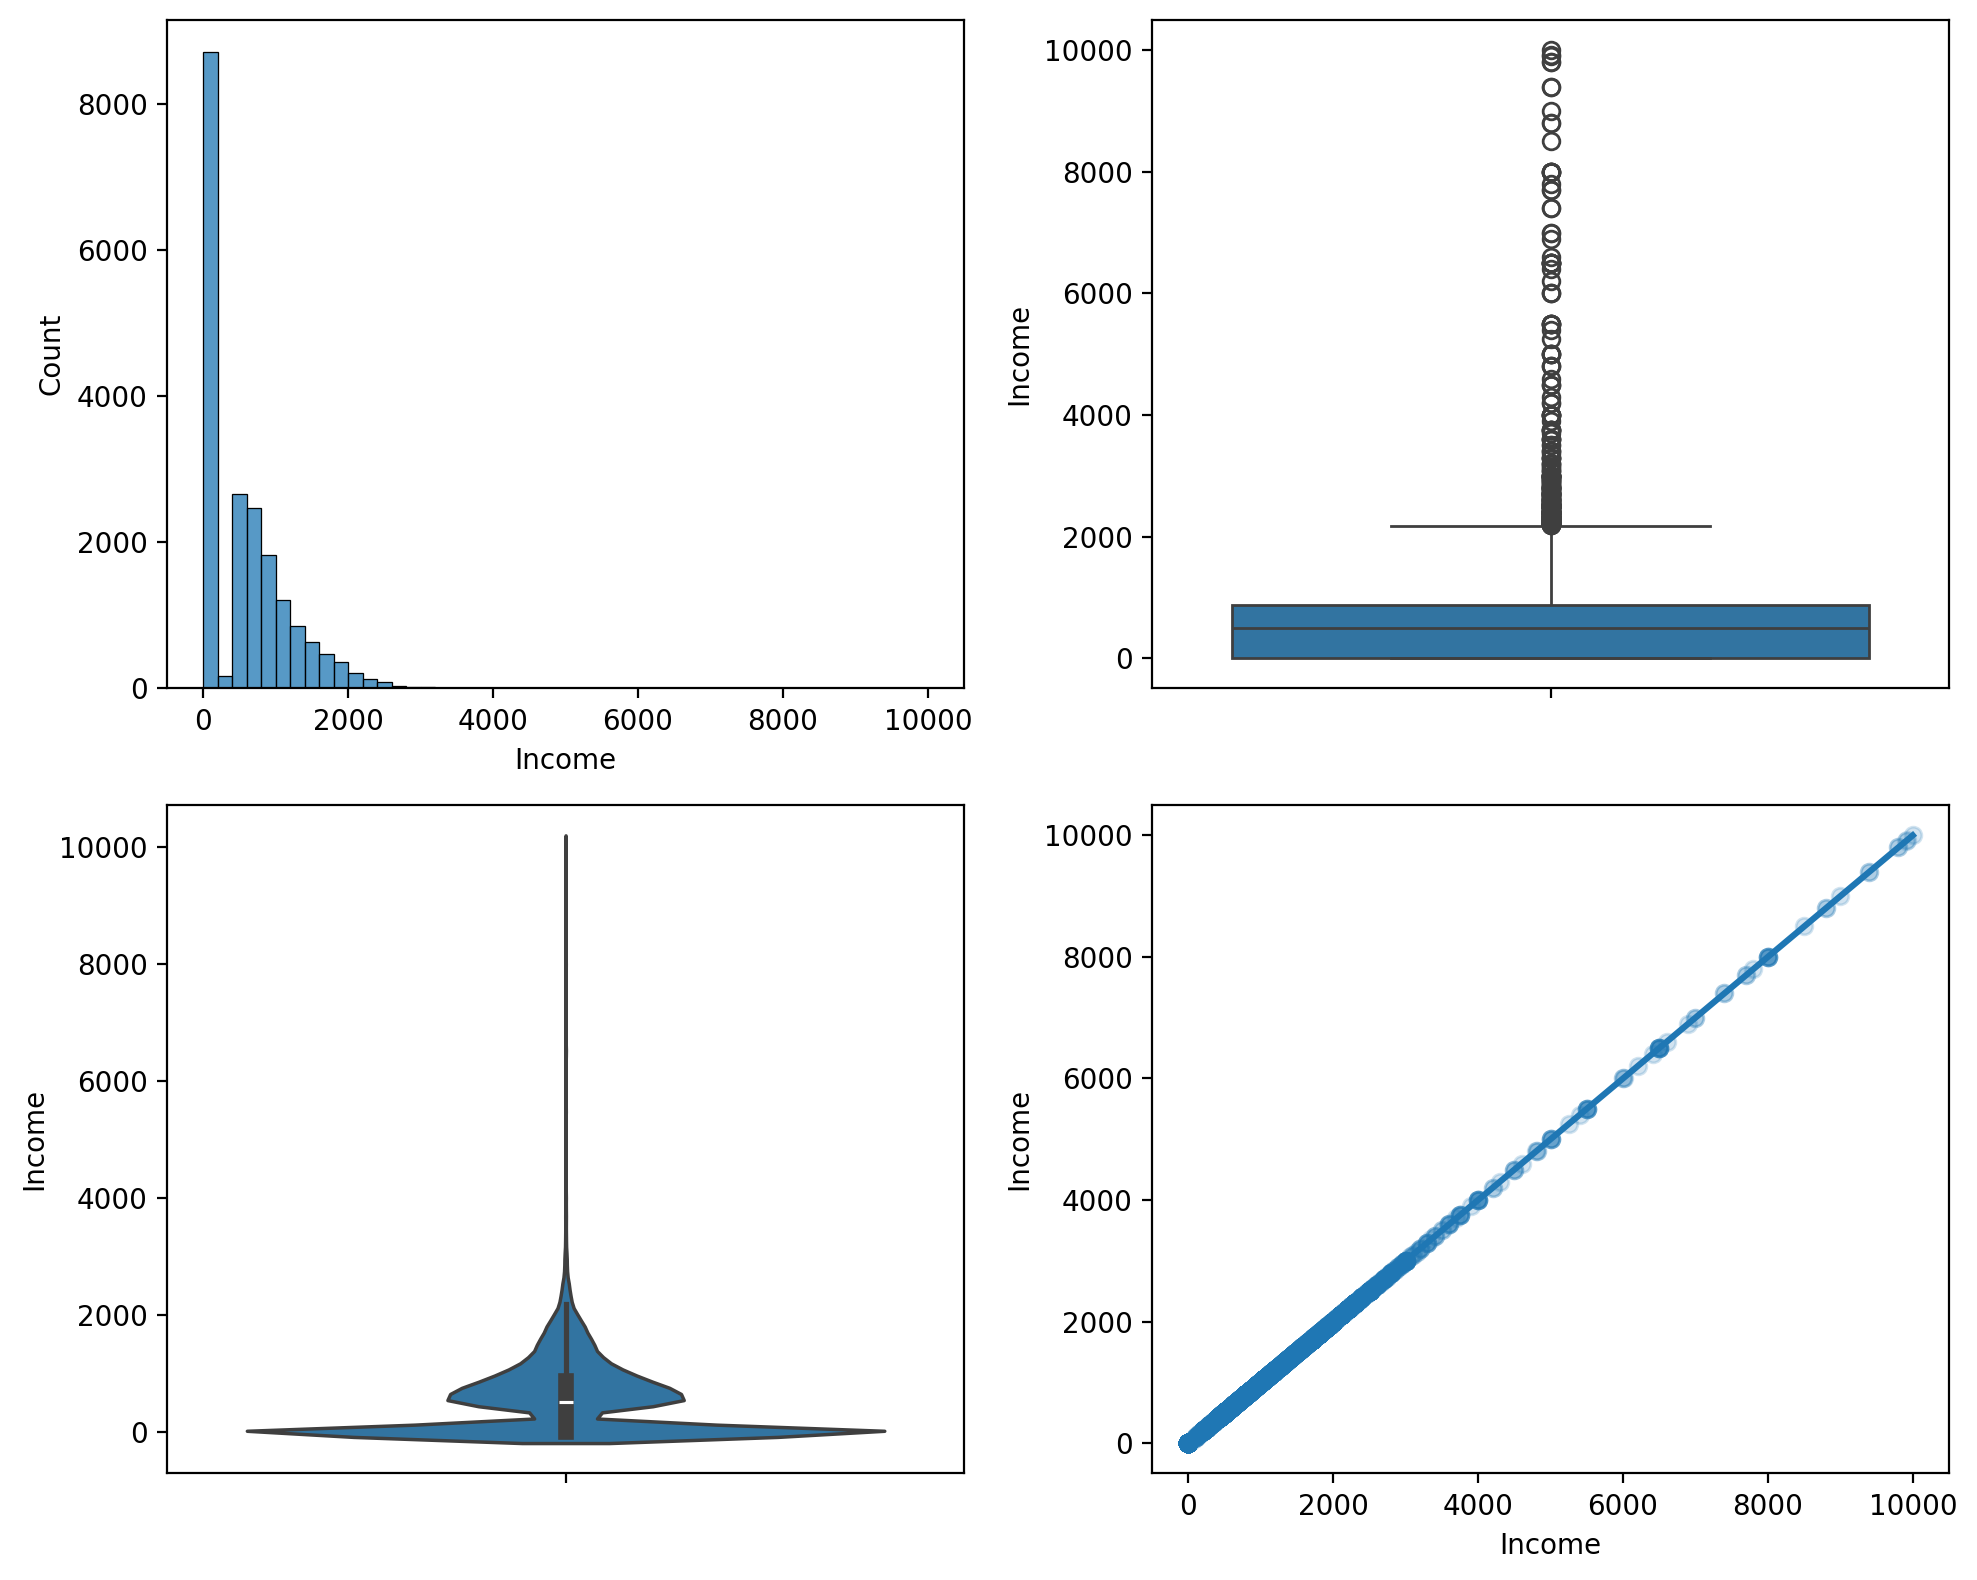

In [ ]:
col = train['Income']
f, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(col, bins=50, ax=ax[0][0])
sns.boxplot(col, ax=ax[0][1])
sns.violinplot(col, ax=ax[1][0])
sns.regplot(x=col, y=train['Income'], scatter_kws={'alpha':0.2}, ax=ax[1][1])
plt.tight_layout()

In [ ]:
train['Income'].value_counts()

0       8697
500      743
700      550
600      547
800      526
        ... 
543        1
1713       1
1602       1
1722       1
2373       1
Name: Income, Length: 1228, dtype: int64

In [ ]:
train['Income'].value_counts(normalize=True)

0       0.43485
500     0.03715
700     0.02750
600     0.02735
800     0.02630
         ...   
543     0.00005
1713    0.00005
1602    0.00005
1722    0.00005
2373    0.00005
Name: Income, Length: 1228, dtype: float64

In [ ]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week_Yearly', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country_Father', 'Birth_Country_Mother', 'Tax_Status', 'Gains',
       'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

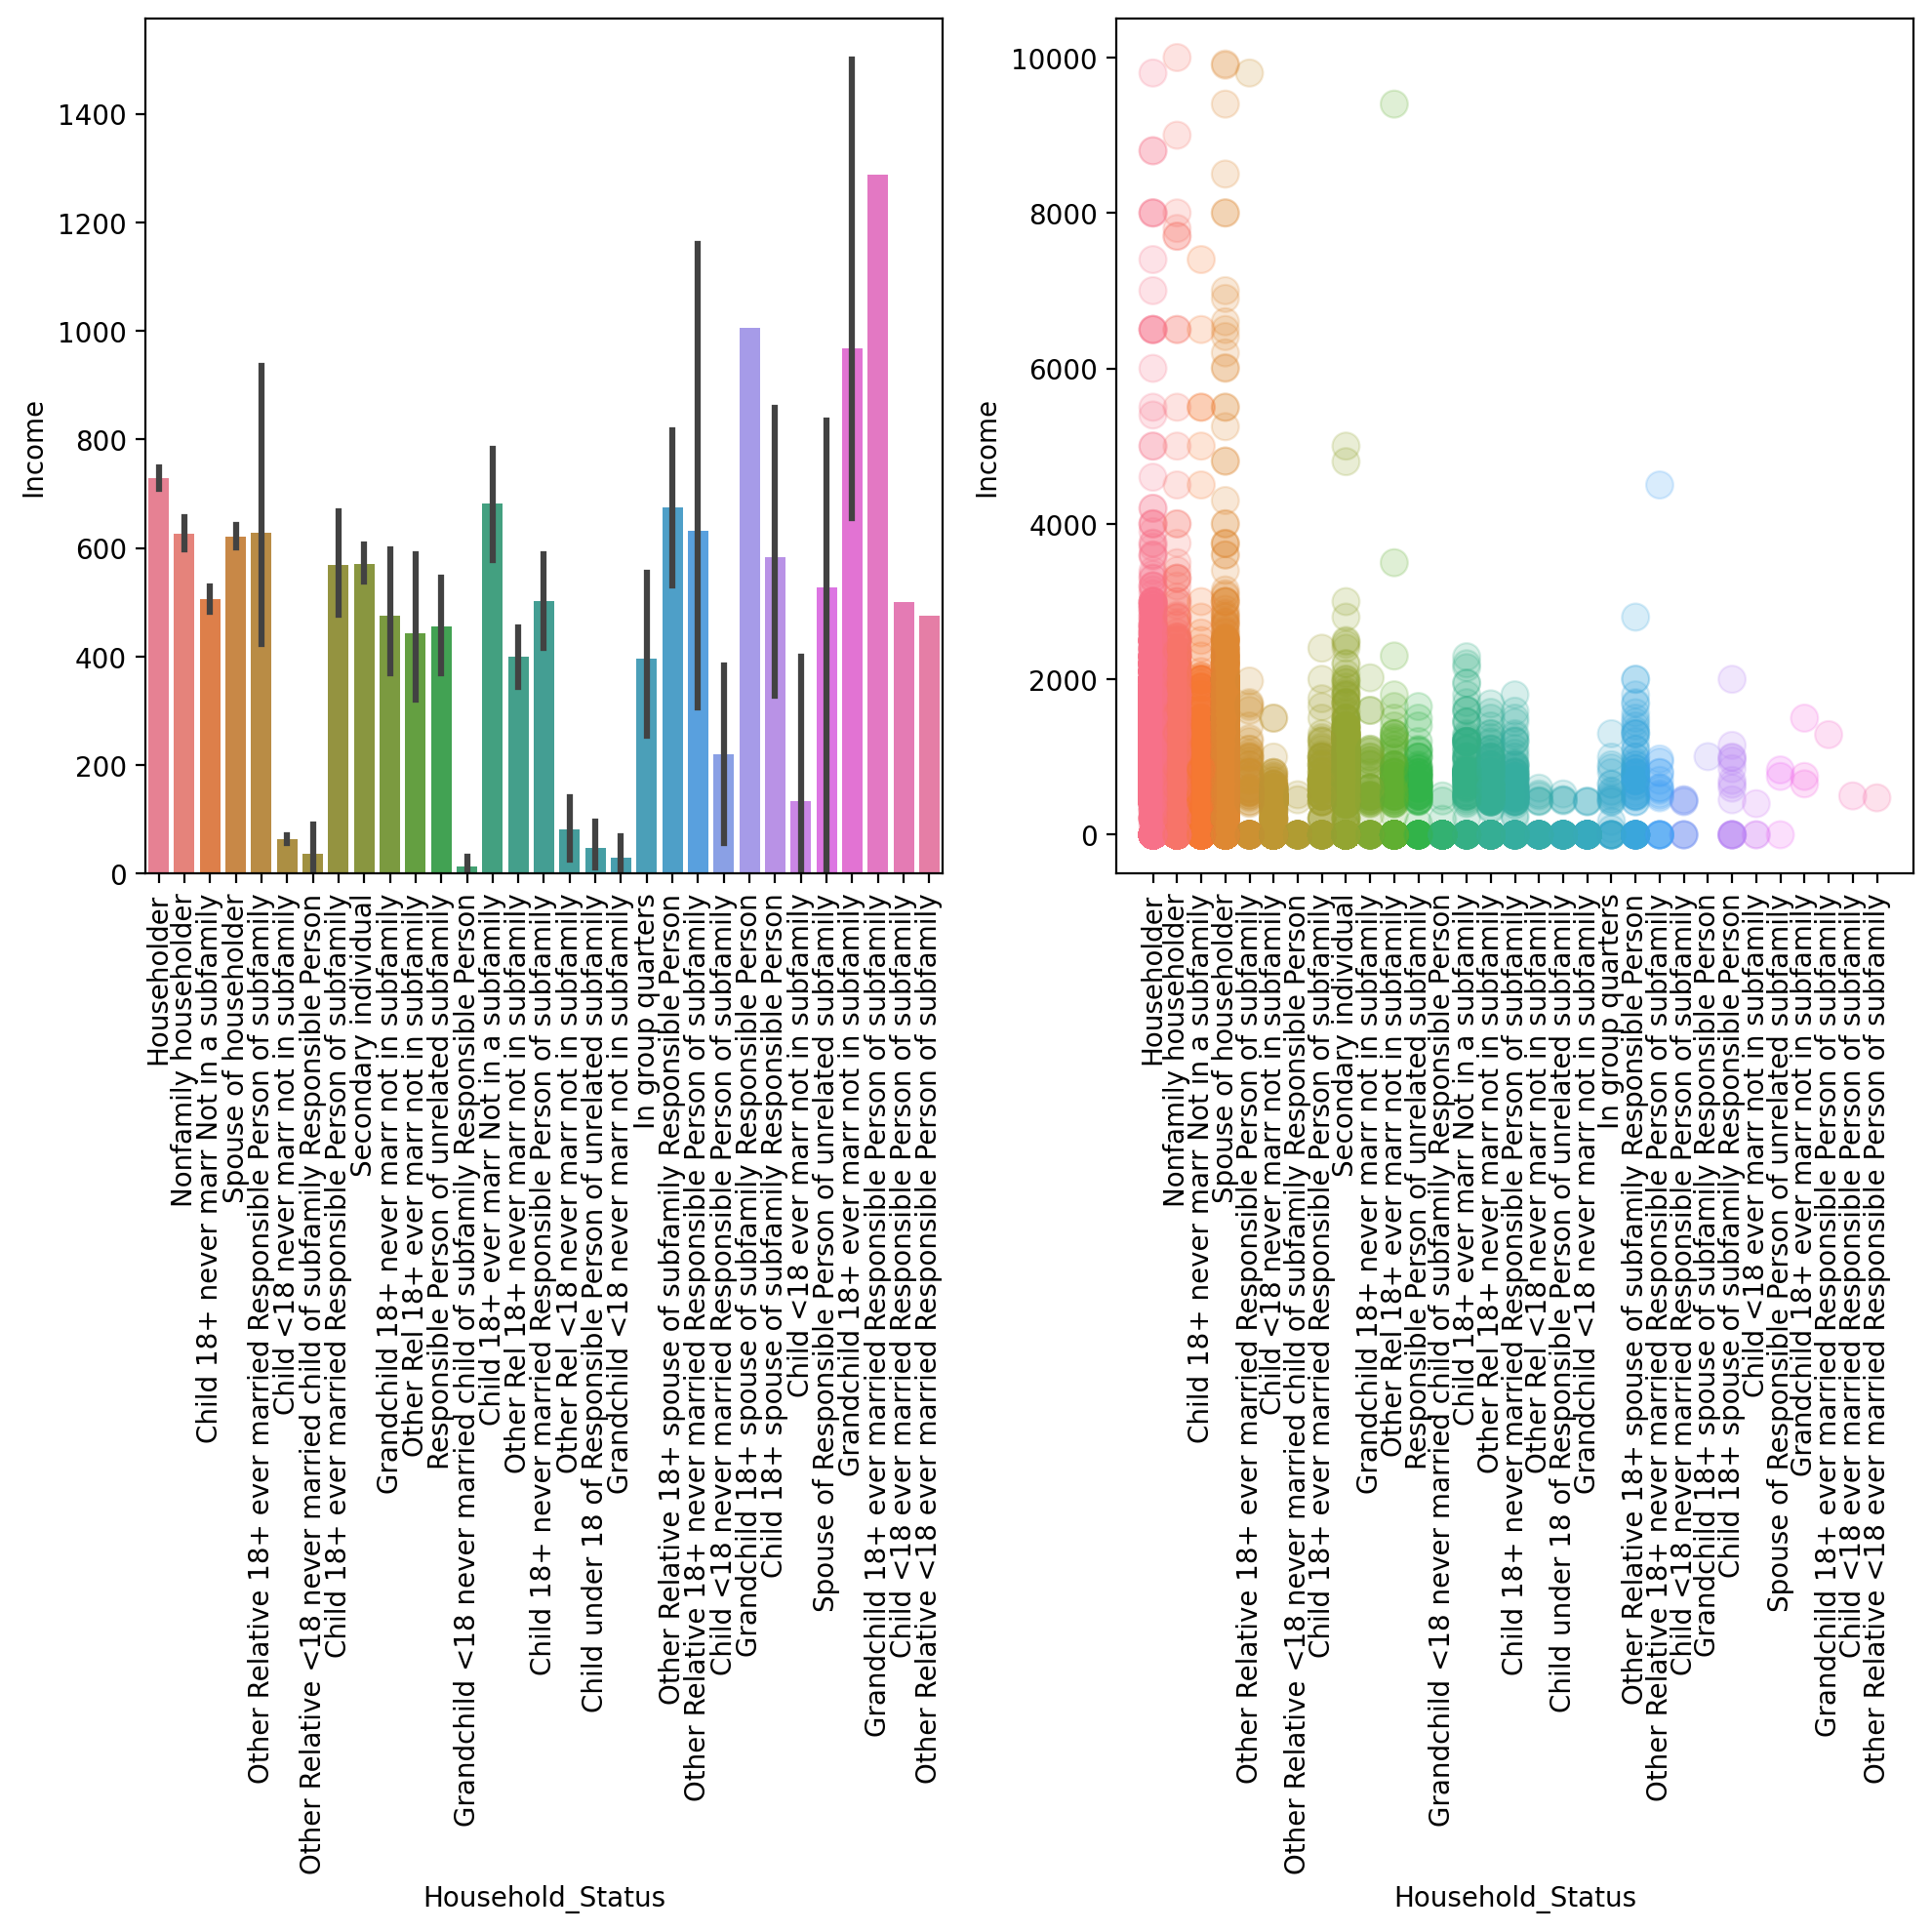

In [17]:
col = train['Household_Status']
f, ax = plt.subplots(1, 2, figsize = (10, 10))

sns.barplot(x=col, y=train['Income'], hue=col, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.scatterplot(x=col, y=train['Income'], hue=col, alpha=0.2, s= 100, edgecolor=None, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].legend().remove()

plt.tight_layout()

<Axes: >

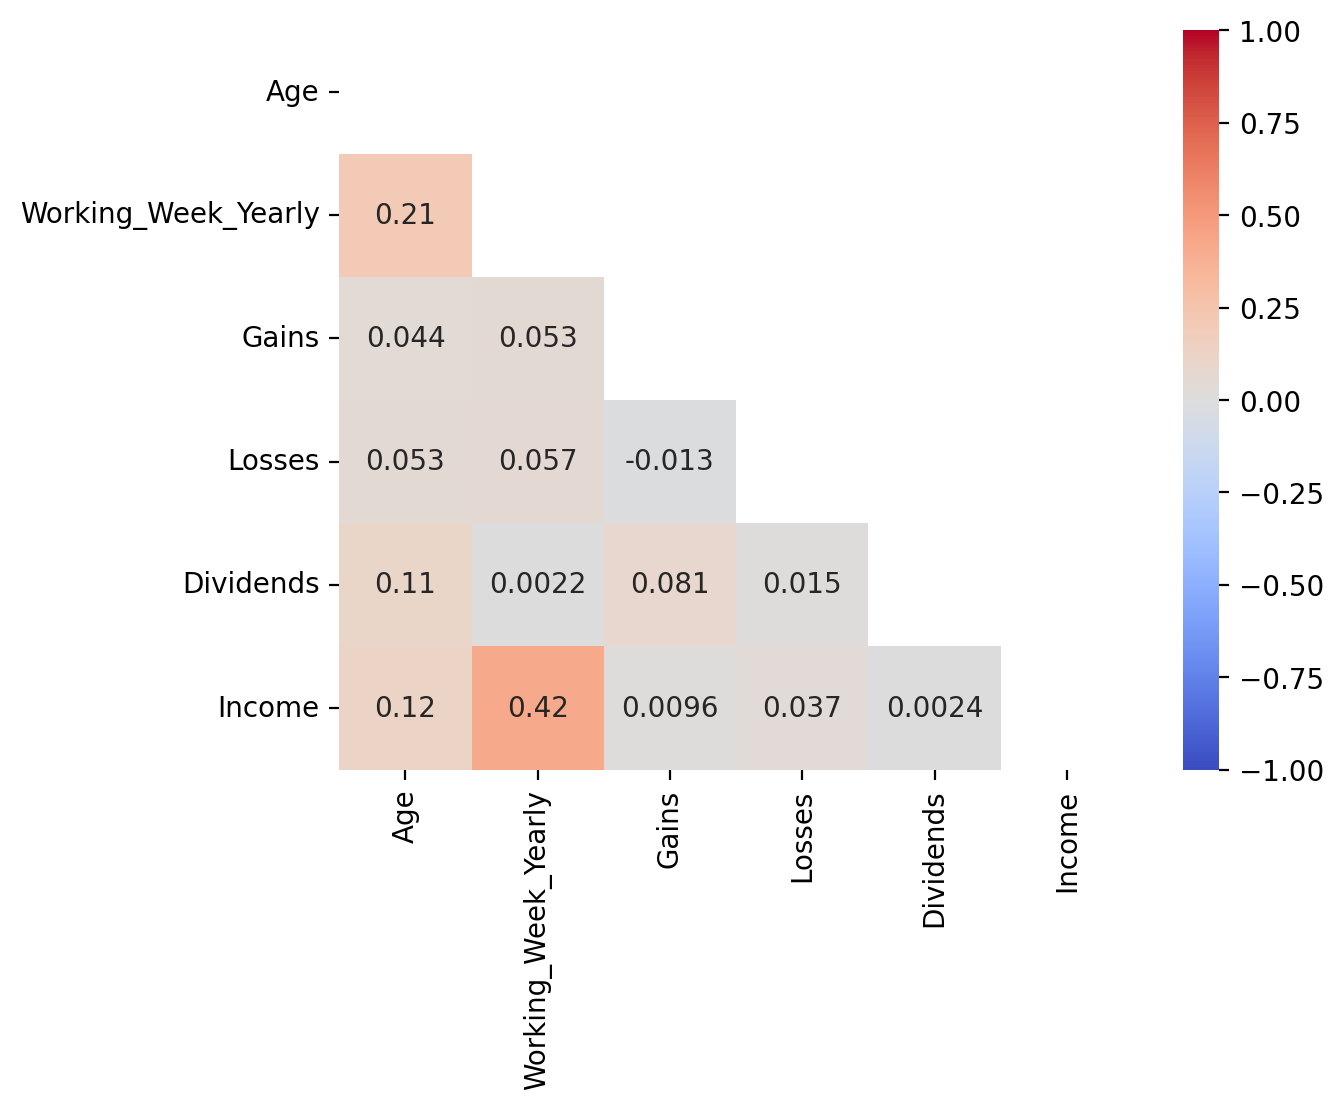

In [ ]:
import numpy as np

# Select only numeric columns
numeric_cols = train.select_dtypes(include=[np.number])

corr = numeric_cols.corr()  # Compute the correlation matrix for numeric columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, mask=mask)

In [ ]:
print(type(train)), print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


(None, None)

## 5. Feature Engineering

In [ ]:
train['Income_Category'] = train['Income'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week_Yearly,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country,Birth_Country_Father,Birth_Country_Mother,Tax_Status,Gains,Losses,Dividends,Income_Status,Income,Income_Category
0,TRAIN_00000,63,M,Middle 7-8,Full-Time,4,Social Services,Services,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,425,1
1,TRAIN_00001,37,M,Associates degree Vocational,Full-Time,52,Entertainment,Services,White,All other,...,US,US,US,Single,0,0,0,Under Median,0,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing Non-durable,Admin Support include Clerical,Black,All other,...,US,US,US,Married Filling Jointly both under 65 MFJ,3411,0,0,Under Median,860,1
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians Support,White,All other,...,US,US,US,Single,0,0,0,Under Median,850,1
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,US,US,US,Head of Household HOH,0,0,0,Unknown,570,1


## 6. Outlier Handling

In [ ]:
# # drop columns outlier based 1.5 IQR of Income
# Q1 = train['Income'].quantile(0.25)
# Q3 = train['Income'].quantile(0.75)
# IQR = Q3 - Q1
# train = train[~((train['Income'] < (Q1 - 2.0 * IQR)) | (train['Income'] > (Q3 + 2.0 * IQR)))]

In [ ]:
# train.shape, test.shape

In [ ]:
# col = train['Income']
# f, ax = plt.subplots(1, 2, figsize = (12, 6))
# sns.histplot(col, bins=50, ax=ax[0])
# sns.boxplot(col, ax=ax[1])
# plt.tight_layout()

## 7. train_x, train_y, train_i, test_x Split

In [ ]:
train_x = train.drop(columns=['ID', 'Income', 'Income_Category'])
train_y = train['Income']
train_i = train['Income_Category']

test_x = test.drop(columns=['ID'])

## 8. Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

# for i in encoding_target:
#     le = LabelEncoder()

#     # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
#     train_x[i] = train_x[i].astype(str)
#     test_x[i] = test_x[i].astype(str)

#     le.fit(train_x[i])
#     train_x[i] = le.transform(train_x[i])

#     # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
#     for case in np.unique(test_x[i]):
#         if case not in le.classes_:
#             le.classes_ = np.append(le.classes_, case)

#     test_x[i] = le.transform(test_x[i])

## 9. One-Hot Encoding

In [ ]:
train_x = pd.DataFrame(train_x, columns=train_x.columns)
test_x = pd.DataFrame(test_x, columns=test_x.columns)

# Select object columns
encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

# Apply one-hot encoding
train_x = pd.get_dummies(train_x, columns=encoding_target)
test_x = pd.get_dummies(test_x, columns=encoding_target)

# Align train and test data to ensure they have the same columns
train_x, test_x = train_x.align(test_x, join='left', axis=1)

# Fill NaN values (if any) with 0
test_x.fillna(0, inplace=True)

In [ ]:
train_x.head()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,63,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,37,52,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,58,52,3411,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,44,52,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,37,52,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
train_y.head()

0    425
1      0
2    860
3    850
4    570
Name: Income, dtype: int64

In [ ]:
train_i.head()

0    1
1    0
2    1
3    1
4    1
Name: Income_Category, dtype: int64

In [ ]:
test_x.head()

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,79,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,47,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,18,52,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,39,30,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,6,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## 10. Scaling Valiables

In [1]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

# Scaling and transform to dataframe type
train_x_scaled = scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x_scaled, index=train_x.index, columns=train_x.columns)

# Scaling and transform to dataframe type
test_x_scaled = scaler.transform(test_x)
test_x = pd.DataFrame(test_x_scaled, index=test_x.index, columns=test_x.columns)

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaler.fit(train_x)
# train_x = scaler.transform(train_x)
# test_x = scaler.transform(test_x)

NameError: name 'train_x' is not defined

In [ ]:
train_x[:3]

,Age,Working_Week_Yearly,Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree Academic,Education_Status_Associates degree Vocational,Education_Status_Bachelors degree,...,Birth_Country_Mother_Yugoslavia,Tax_Status_Head of Household HOH,Tax_Status_Married Filling Jointly both over 65 MFJ,Tax_Status_Married Filling Jointly both under 65 MFJ,Tax_Status_Married Filling Jointly one over 65 one under 65 MFJ,Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,1.520927,-1.390447,-0.092451,-0.144003,-0.102286,-1.048368,1.048368,-0.177218,-0.196152,-0.329244,...,-0.029167,-0.254544,-0.154962,-0.867491,-0.124443,2.040251,-0.619513,-0.195601,-1.399024,1.522810
1,0.075998,0.766465,-0.092451,-0.144003,-0.102286,-1.048368,1.048368,-0.177218,5.098093,-0.329244,...,-0.029167,-0.254544,-0.154962,-0.867491,-0.124443,-0.490136,1.614172,-0.195601,0.714784,-0.656681
2,1.243056,0.766465,0.730638,-0.144003,-0.102286,0.953863,-0.953863,-0.177218,-0.196152,-0.329244,...,-0.029167,-0.254544,-0.154962,1.152749,-0.124443,-0.490136,-0.619513,-0.195601,0.714784,-0.656681


## 11. Predicting '0' income

In [ ]:
train_xi, val_xi, train_ii, val_ii = train_test_split(train_x, train_i, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    DecisionTreeClassifier(): 'DecisionTreeClassifier',
    RandomForestClassifier(): 'RandomForestClassifier',
    SGDClassifier(): 'SGDClassifier',
    LogisticRegression(): 'LogisticRegression',
    XGBClassifier(): 'XGBClassifier'
}

for model in models.keys():
    model.fit(train_xi, train_ii)
    pred_i = model.predict(val_xi)
    acc = accuracy_score(val_ii, pred_i)
    prec = precision_score(val_ii, pred_i, average='binary')
    rec = recall_score(val_ii, pred_i, average='binary')
    f1 = f1_score(val_ii, pred_i, average='binary')
    print(f"{models[model]}: Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")

DecisionTreeClassifier: Accuracy: 0.7455, Precision: 0.7764, Recall: 0.7688, F1-Score: 0.7726
RandomForestClassifier: Accuracy: 0.8125, Precision: 0.7757, Recall: 0.9378, F1-Score: 0.8490
SGDClassifier: Accuracy: 0.7927, Precision: 0.7700, Recall: 0.9004, F1-Score: 0.8301
LogisticRegression: Accuracy: 0.8187, Precision: 0.7755, Recall: 0.9538, F1-Score: 0.8554
XGBClassifier: Accuracy: 0.8210, Precision: 0.7819, Recall: 0.9453, F1-Score: 0.8559


In [ ]:
pred_i = model.predict(test_x)
test_i = pd.DataFrame(pred_i, columns=['Income_Category'])
print(test_i)

      Income_Category
0                   0
1                   0
2                   1
3                   1
4                   0
...               ...
9995                1
9996                1
9997                1
9998                0
9999                1

[10000 rows x 1 columns]


In [ ]:
# Concatenate the features and labels
train_x = pd.concat([train_x, train_i.reset_index(drop=True)], axis=1)
test_x = pd.concat([test_x, test_i.reset_index(drop=True)], axis=1)

train_x.shape, train_y.shape, test_x.shape

((20000, 276), (20000,), (10000, 276))

## 12. Split train_x, val_x, train_y, val_y

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3)

## 13. Test with sklearn models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {LinearRegression(): 'LinearRegression',
          SGDRegressor(): 'SGDRegressor',
          # LogisticRegression(max_iter=10000): 'LogisticRegression',
          RandomForestRegressor(): 'RandomForestRegressor',
          SVR(): 'SVR',
          XGBRegressor(): 'XGBRegressor'}

for model in models.keys():
    model.fit(train_x, train_y)
    pred = model.predict(val_x)
    mse = mean_squared_error(val_y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(val_y, pred)
    print(f'{models[model]}: RMSE {rmse}, R^2 {r2}')

LinearRegression: RMSE 924275451733905.8, R^2 -1.6648232424421005e+24
SGDRegressor: RMSE 138117700259.03873, R^2 -3.7176112202479096e+16
RandomForestRegressor: RMSE 474.4931812875431, R^2 0.5612418013230589
SVR: RMSE 673.9887005050135, R^2 0.11474064580635979
XGBRegressor: RMSE 476.4747511563261, R^2 0.5575694810051333


In [ ]:
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


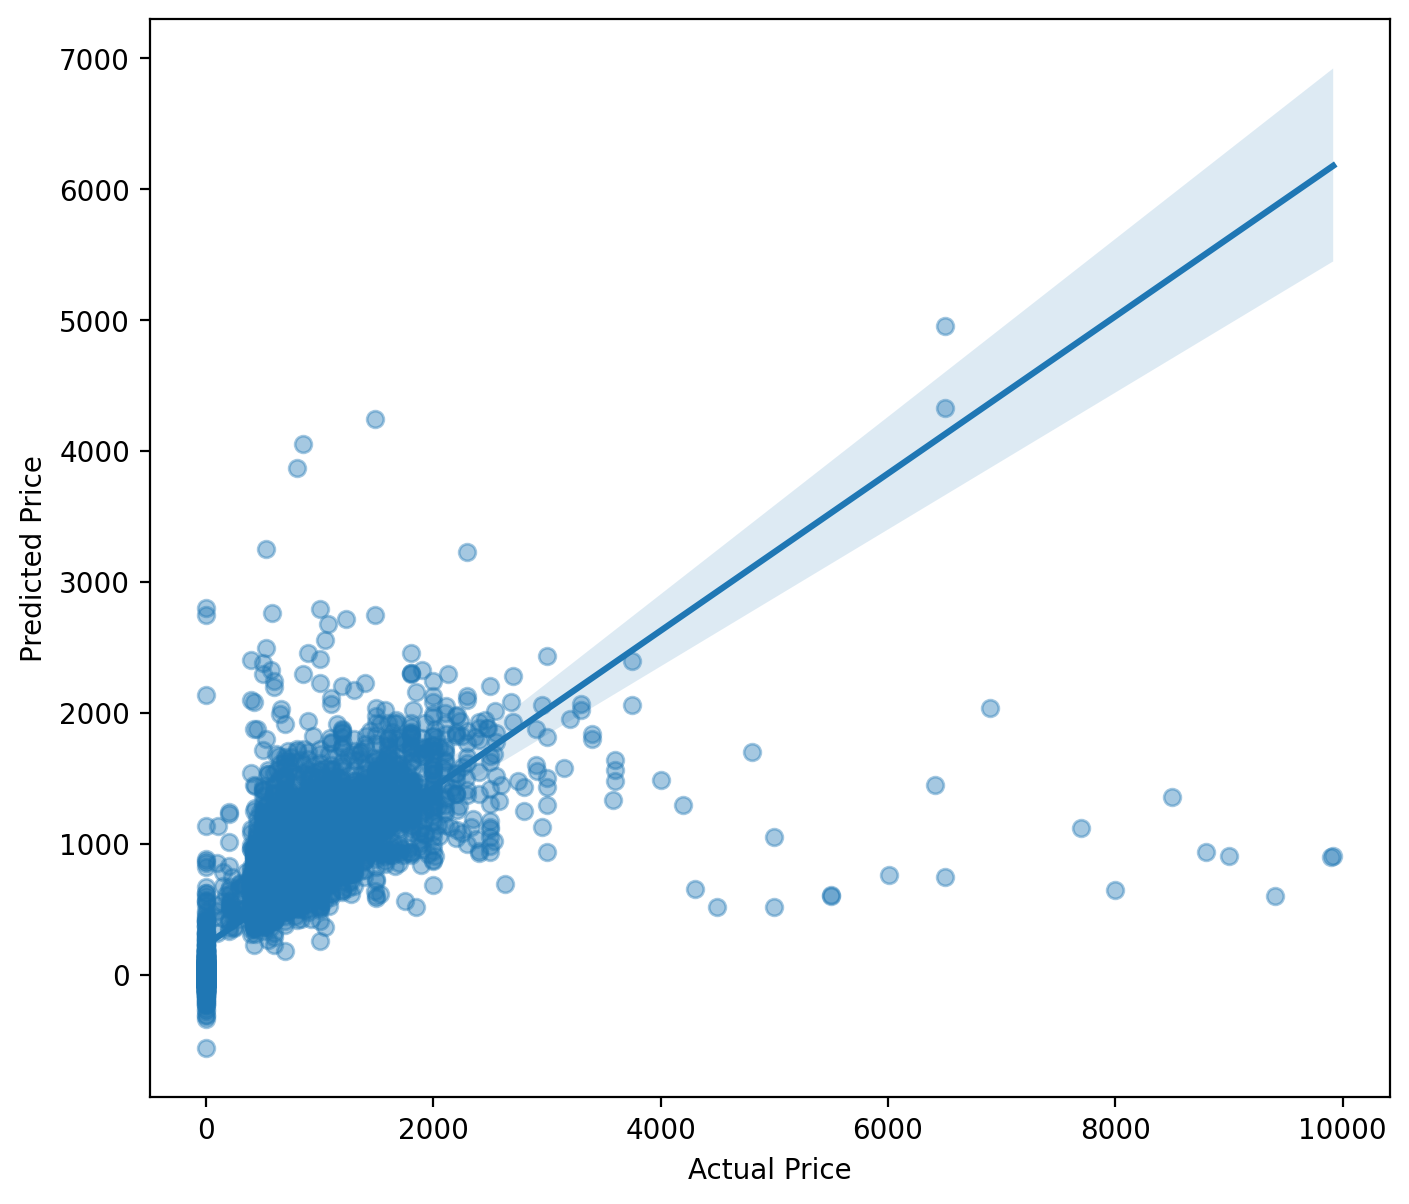

In [ ]:
pred_y = model.predict(val_x)
plt.figure(figsize=(8, 7))
sns.regplot(x = val_y, y = pred_y, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## 14. DNN Model Design

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras


model = models.Sequential()
model.add(layers.Input(shape=(276,)))

model.add(layers.Dense(128*4, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128*3, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128*2, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Activation('sigmoid'))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               141824    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               196992    
                                                                 
 batch_normalization_1 (Bat  (None, 384)               1536      
 chNormalization)                                       

In [ ]:
# from tensorflow.keras import models, layers
# from tensorflow.keras import callbacks
# import keras

# # Input
# model = models.Sequential()
# model.add(layers.Input(shape=(276,)))

# # Hidden-1
# model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.05)))
# model.add(layers.BatchNormalization())
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))

# # Hidden-2
# model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.05)))
# model.add(layers.BatchNormalization())
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))

# # Hidden-3
# model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.05)))
# model.add(layers.BatchNormalization())
# model.add(layers.ReLU())
# model.add(layers.Dropout(0.5))

# # Output
# model.add(layers.Dense(1))

In [ ]:
# from tensorflow.keras import models, layers
# from tensorflow.keras import callbacks
# from tensorflow.keras.activations import tanh, relu
# import keras

# # Input
# model = models.Sequential()
# model.add(layers.Input(shape=(276,)))

# # Hidden-1
# model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.1)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation(relu))
# model.add(layers.Dropout(0.5))

# # Hidden-2
# model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.1)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation(relu))
# model.add(layers.Dropout(0.5))

# # Hidden-3
# model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.1)))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation(relu))
# model.add(layers.Dropout(0.5))

# # Output
# model.add(layers.Dense(1))

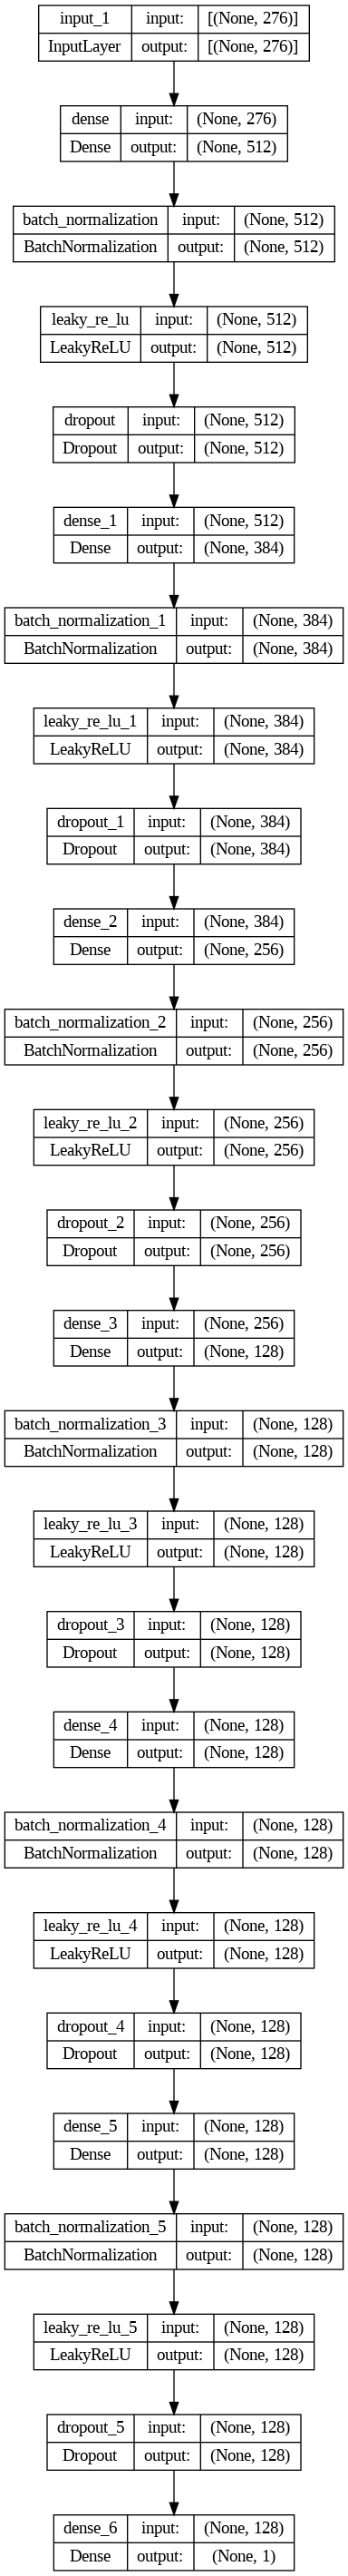

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## 15. Complie Model and Training

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop
from keras import backend as K

# Define the learning rate
learning_rate = 0.001

# Define the optimizer with the learning rate
optimizer = RMSprop(learning_rate=learning_rate)

def root_mean_squared_error(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))           # K.epsilon() to avoid divide with 0 value

# Compile the model with the optimizer
model.compile(loss=root_mean_squared_error,
              optimizer=optimizer,
              metrics=[r_squared])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define the learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    drop_rate = 0.5
    epochs_drop = 5.0
    return initial_lr * (drop_rate ** (epoch // epochs_drop))

lr_scheduler_cb = LearningRateScheduler(lr_schedule)

check_point_cb = ModelCheckpoint('/content/gdrive/MyDrive/Dacon/dacon_model12.keras',
                                 save_best_only=True)

early_stopping_cb = EarlyStopping(patience=10,
                                  monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(train_x, train_y,
                     batch_size=32,
                     epochs=100,
                     validation_data=(val_x, val_y),
                     verbose=1,
                     callbacks=[check_point_cb, early_stopping_cb, lr_scheduler_cb])

Epoch 1/100
438/438 [==============================] - 11s 18ms/step - loss: 573.8067 - r_squared: 0.2786 - val_loss: 516.7390 - val_r_squared: 0.4869 - lr: 0.0100
Epoch 2/100
438/438 [==============================] - 6s 15ms/step - loss: 466.5602 - r_squared: 0.6024 - val_loss: 430.0286 - val_r_squared: 0.6926 - lr: 0.0100
Epoch 3/100
438/438 [==============================] - 7s 16ms/step - loss: 463.1878 - r_squared: 0.6128 - val_loss: 424.1632 - val_r_squared: 0.6986 - lr: 0.0100
Epoch 4/100
438/438 [==============================] - 8s 17ms/step - loss: 454.0626 - r_squared: 0.6278 - val_loss: 422.5533 - val_r_squared: 0.7011 - lr: 0.0100
Epoch 5/100
438/438 [==============================] - 8s 17ms/step - loss: 455.1310 - r_squared: 0.6171 - val_loss: 418.8129 - val_r_squared: 0.7048 - lr: 0.0100
Epoch 6/100
438/438 [==============================] - 7s 17ms/step - loss: 435.9834 - r_squared: 0.6337 - val_loss: 403.5827 - val_r_squared: 0.7136 - lr: 0.0050
Epoch 7/100
438/438 [

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'r_squared', 'val_loss', 'val_r_squared', 'lr'])


## 16. Evaluation

In [ ]:

def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['r_squared']
    val_accuracy = history_dict['val_r_squared']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_r_squared')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_r_squared')
    ax2.set_title('Train and Validation r_squared')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('r_squared')
    ax2.grid()
    ax2.legend()

    plt.show()

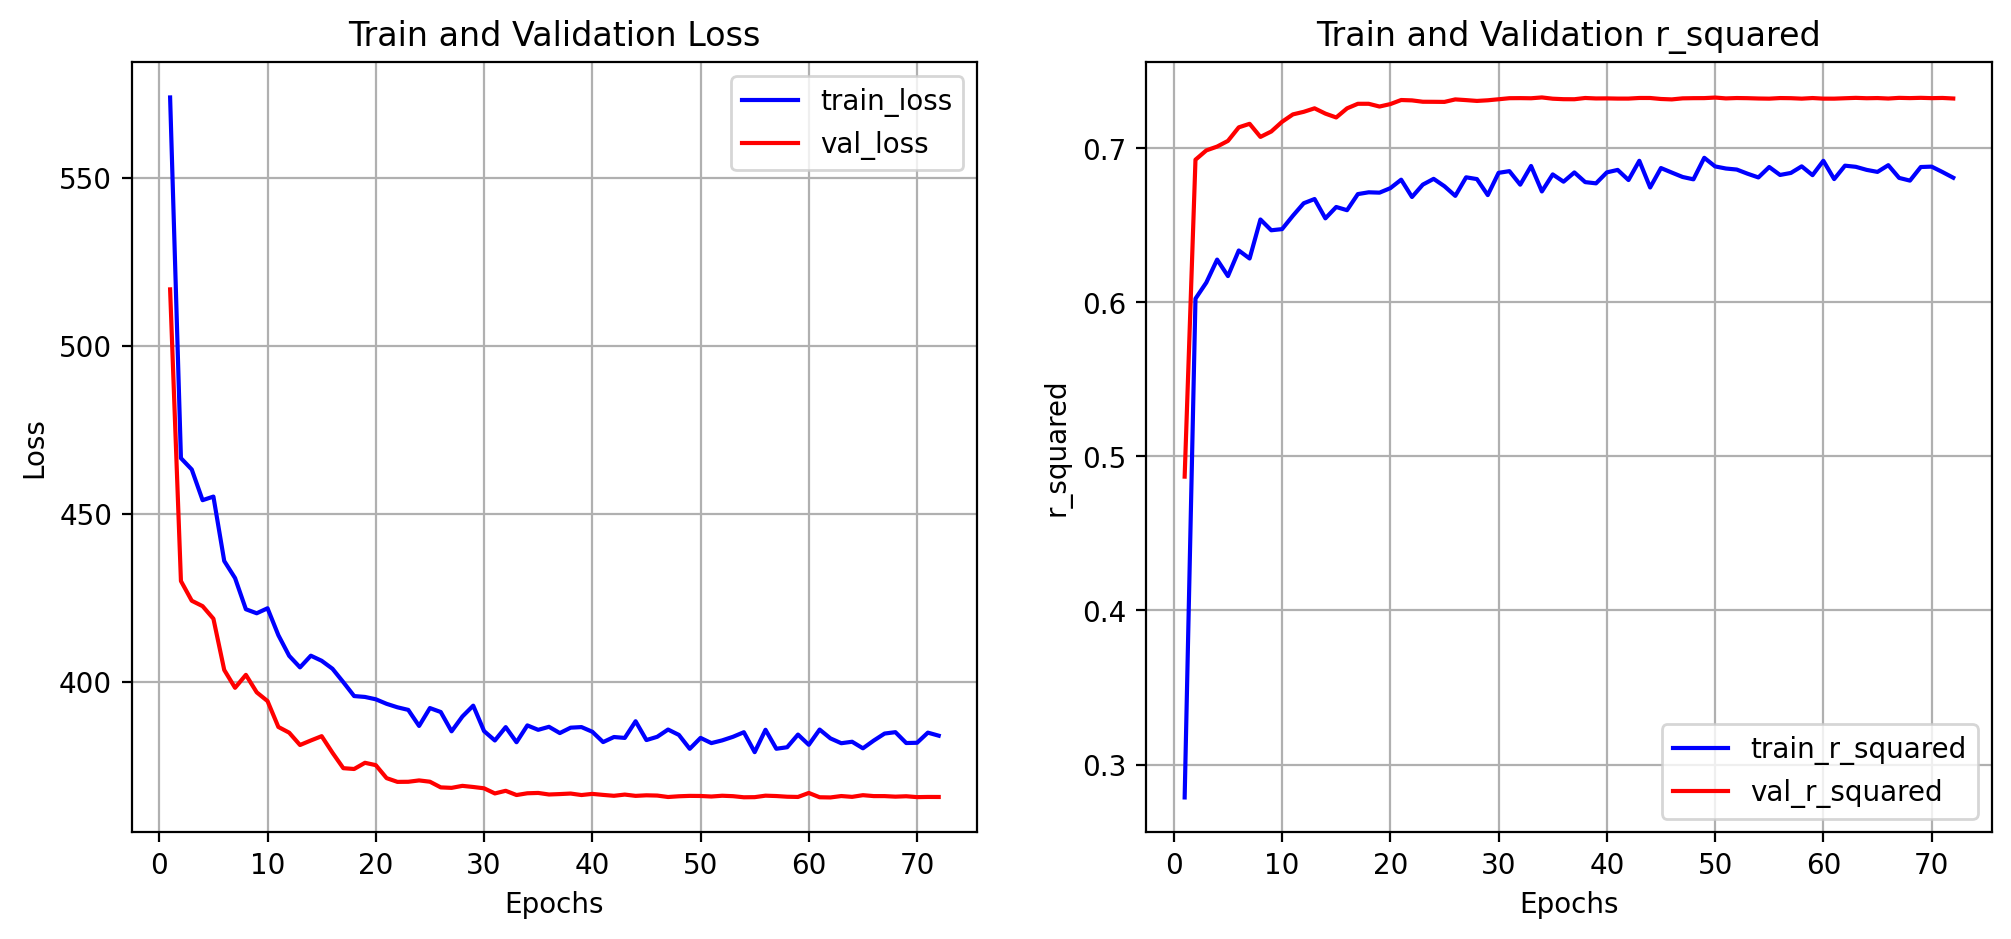

In [ ]:
show_history_r(history)

188/188 [==============================] - 1s 4ms/step


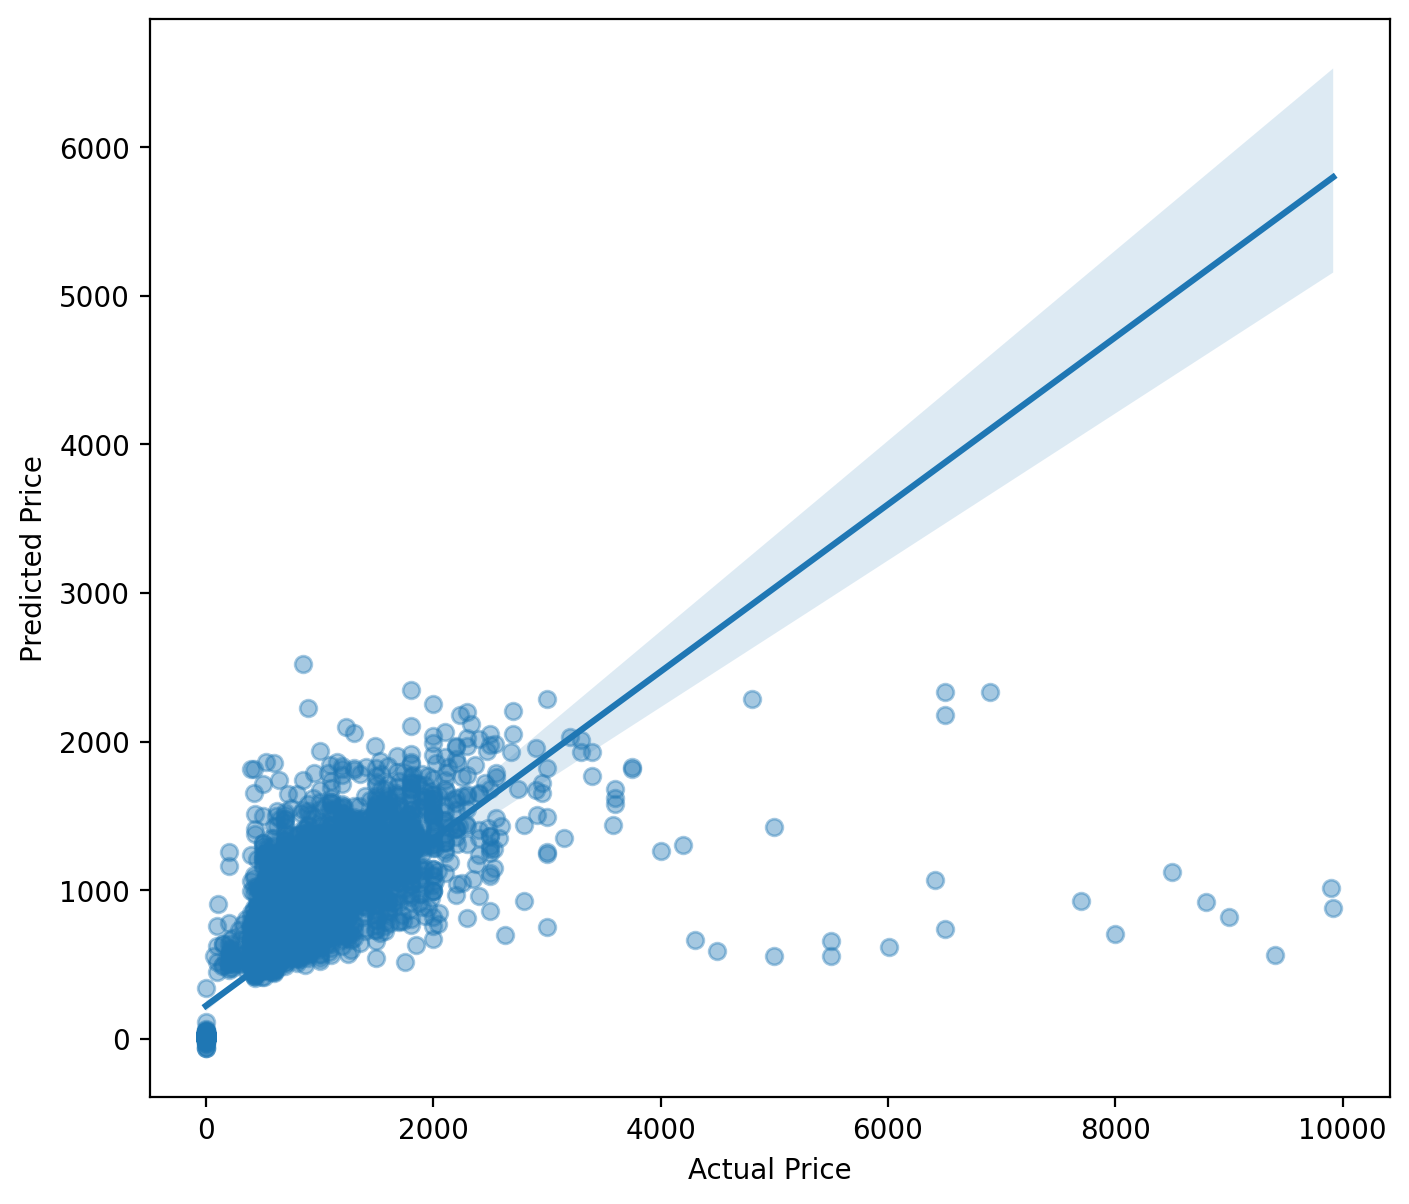

In [ ]:
pred_y = model.predict(val_x)
plt.figure(figsize=(8, 7))
sns.regplot(x = val_y, y = pred_y, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

188/188 [==============================] - 2s 12ms/step


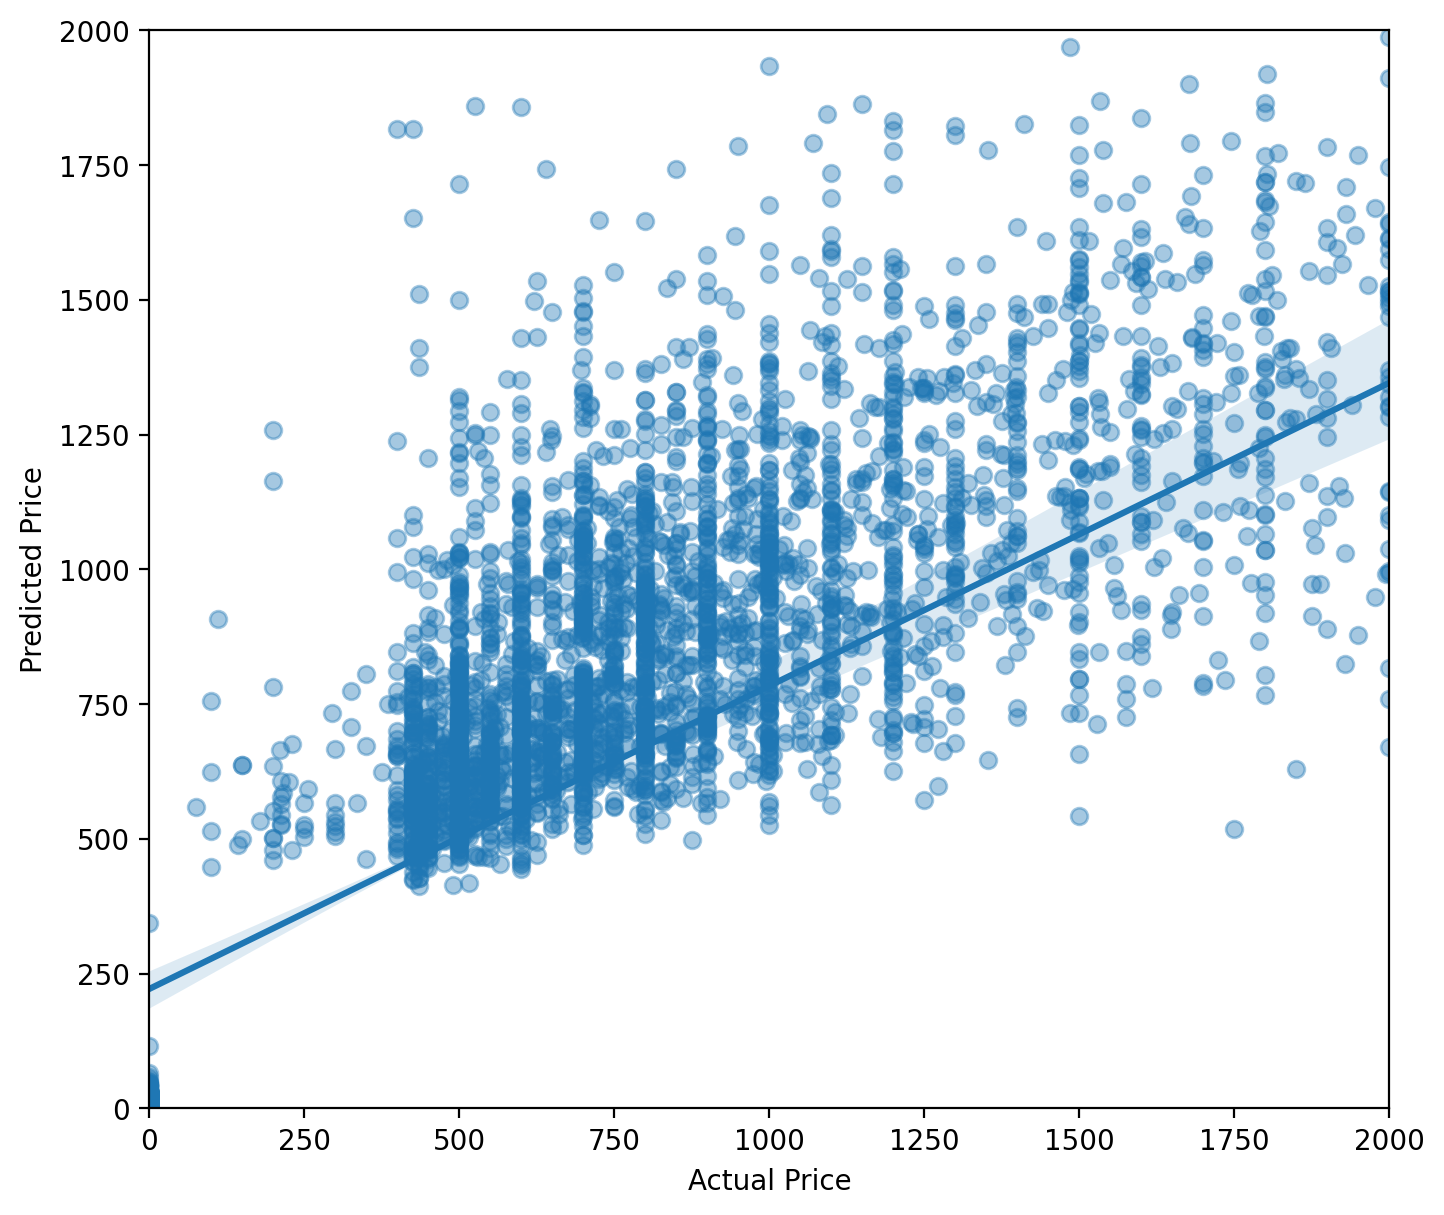

In [ ]:
# Make predictions
pred_y = model.predict(val_x)

# Set the figure size
plt.figure(figsize=(8, 7))

# Plot the data points
sns.regplot(x=val_y, y=pred_y, scatter_kws={'alpha': 0.4})

# Set the x and y axis limits
plt.xlim((0, 2000))
plt.ylim((0, 2000))

# Set the x and y axis labels
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Show the plot
plt.show()

## 17. Prediction

In [ ]:
preds = model.predict(test_x)

313/313 [==============================] - 2s 5ms/step


## 18. Generating Prediction Dataset

In [ ]:
submission = pd.read_csv('/content/gdrive/My Drive/Dacon/sample_submission.csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,11.144354
1,TEST_0001,0.575299
2,TEST_0002,478.930237
3,TEST_0003,698.018372
4,TEST_0004,12.412081
...,...,...
9995,TEST_9995,1275.806030
9996,TEST_9996,791.941956
9997,TEST_9997,477.425476
9998,TEST_9998,17.601435


## 19. Save Submission CSV file

In [ ]:
submission.to_csv('/content/gdrive/My Drive/Dacon/dacon_submission12.csv', index=False)